In [1]:
from IPython.display import Image

# 선형 회귀

## 단순 선형 회귀

In [2]:
Image(url='https://git.io/Jts3N', width=500) 

**단순 선형 회귀**는 **설명 변수(x)**와 **응답변수(y)** 사이의 관계를 모델링  

$y=w_0+w_1x$  

오차가 최소가 되도록 선형 방정식의 가중치를 학습

## 다중 선형 회귀

In [3]:
Image(url='https://git.io/Jts3p', width=500) 

여러 개의 특성이 있는 경우 **다중 선형 회귀**라고 한다.

$y=w_0x_0+w_1x_1+ \cdots +w_mx_m= \sum{i=0}^m w_ix_i=w^Tx$

# 주택 데이터셋 탐색

## 데이터프레임으로 주택 데이터셋 읽기

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 데이터셋의 중요 특징 시각화

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

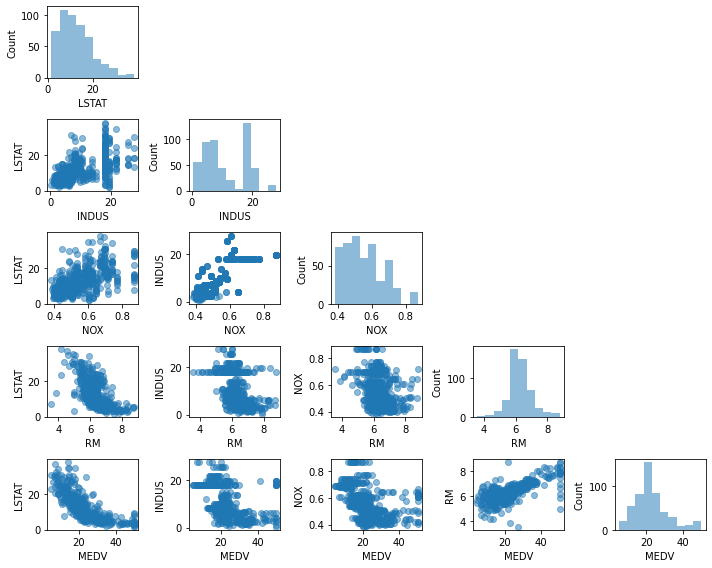

In [8]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# 산점도 행렬
scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

## 상관관계 행렬을 사용한 분석

**상관관계 행렬** : (직관적 해석) 스케일 조정된 공분산 행렬

공분산 행렬 : 

상관관계 행렬은 **피어슨 상관관계 계수**($r$)를 포함하고 있는 정방 행렬  
피어슨 상관관계 계수는 특성 사이의 선형 의존성을 측정  

$r={\sum_{i=1}^n \left[ \left( x^{(i)}-\mu_x \right) \left( y^{(i)}-\mu_y \right) \right] \over \sqrt{\sum_{i=1}^n \left( x^{(i)}-\mu_x \right)^2} \sqrt{\sum_{i=1}^n \left( y^{(i)}-\mu_y \right)^2}} = {\sigma_{xy} \over \sigma_x \sigma_y}$  
- $\mu$ : 해당 특성의 샘플 평균
- $\sigma_{xy}$ : 특성 x와 y 사이의 공분산
- $\sigma_x$, $\sigma_y$ : 특성의 표준편차  

heatmap 함수를 사용하면 각 features들의 상관관계 행렬를 나타낼 수 있음

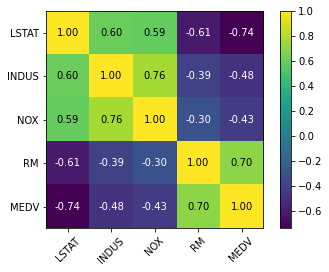

In [9]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.show()

# 최소 제곱 선형 회귀 모델 구현

## 경사 하강법으로 회귀 모델의 파라미터 구하기

2장에서 선형 활성화 함수를 사용한 인공 뉴런인 **아달린**구현  

$J(w)={1 \over 2} \sum_{i=1}^n \left( y^{(i)}- \hat{y}^{(i)} \right)^2$

목적함수 $J(w)$를 정의하고 **경사 하강법** or **확률적 경사 하강법** 같은 최적화 알고리즘을 사용하여 가중치 학습

In [10]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [11]:
X = df[['RM']].values
y = df['MEDV'].values

In [12]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [13]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

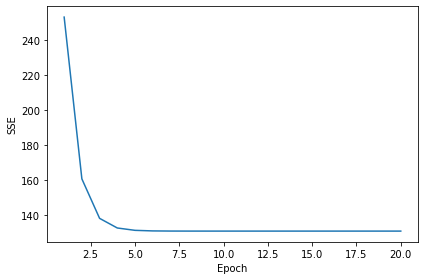

In [14]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

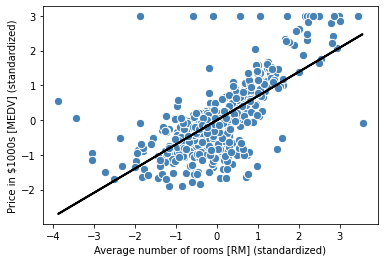

In [16]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

In [17]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

기울기: 0.695
절편: -0.000
$1,000 단위 가격: 10.840


## 사이킷런으로 회귀 모델의 가중치 추정

In [18]:
from sklearn.linear_model import LinearRegression


slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


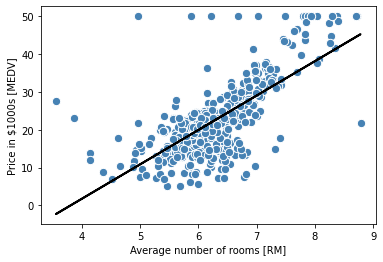

In [19]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

**정규 방정식**을 사용한 방법:

In [20]:
# 1로 채워진 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


QR 분해는 실수 행렬을 직교 행렬(orthogonal matrix) $\boldsymbol{Q}$와 상삼각 행렬(upper triangular matrix) $\boldsymbol{R}$의 곱으로 표현하는 행렬 분해 방법이다.  
직교 행렬은 전치 행렬과 역행렬이 같아서 선형 회귀 공식을 $\boldsymbol{w}$에 정리하면 다음과 같이 쓸 수 있다.

$\boldsymbol{w} = \boldsymbol{X}^{-1}\boldsymbol{y} 
= (\boldsymbol{Q}\boldsymbol{R})^{-1}\boldsymbol{y}
= \boldsymbol{R}^{-1}\boldsymbol{Q}^{-1}\boldsymbol{y}
= \boldsymbol{R}^{-1}\boldsymbol{Q}^T\boldsymbol{y}
$

`np.linalg.qr()` 함수를 사용하여 QR 분해를 수행한 다음 `np.linalg.inv()` 함수를 사용해 상삼각 행렬의 역행렬을 구하여 계산

In [21]:
Q, R = np.linalg.qr(Xb)
w = np.dot(np.linalg.inv(R), np.dot(Q.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


`LinearRegression` 클래스가 사용하는 `scipy.linalg.lstsq` 함수는 $\boldsymbol{X}$의 유사역행렬(pseudo-inverse matrix) $\boldsymbol{X}^+$을 구하여 다음처럼 바로 해를 구합니다.

$\boldsymbol{w} = \boldsymbol{X}^+\boldsymbol{y}$

유사역행렬은 특잇값 분해(SVD)로 얻은 $\boldsymbol{U}$, $\boldsymbol{\Sigma}$, $\boldsymbol{U}$로 계산

$\boldsymbol{X}^+ = \boldsymbol{V}\boldsymbol{\Sigma}^+\boldsymbol{U}^T$

여기에서 $\boldsymbol{\Sigma}^+$는 $\boldsymbol{\Sigma}$ 원소의 역수를 취하고 어떤 임곗값보다 작은 값은 0으로 만들어 얻을 수 있다. 예를 들어 $\boldsymbol{\Sigma}$의 행마다 가장 큰 값을 골라 $1 \times 10^{-15}$를 곱한 다음 이보다 작은 원소를 0으로 만든다. 넘파이 `np.linalg.pinv()` 함수를 사용하면 이런 작업을 모두 알아서 처리해 주므로 $\boldsymbol{X}^+$를 손쉽게 얻을 수 있다.

In [22]:
w = np.dot(np.linalg.pinv(Xb), y)

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


# RANSAC을 사용하여 안정된 회귀 모델 훈련

선형 회귀 모델은 이상치에 영향을 많이 받는다. 하지만 이상치를 제거하려면 데이터 과학자로서의 식견도 필요하여 많은 공부를 해야한다.  
이상치를 제거하는 방법 대신 **RANSAC**알고리즘을 사용하는 안정된 회귀 모델을 알아보자.  

RANSAC 알고리즘  
1. 랜덤하게 일부 샘플을 정상치로 선택하여 모델 훈련
2. 훈련된 모델에서 다른 모든 포인트를 테스트 -> 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가
3. 모든 정상치를 사용하여 모델 다시 훈련
4. 훈련된 모델과 정상치 간의 오차 추정
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘을 종료 / 그렇지 않으면 1로 돌아가서 반복

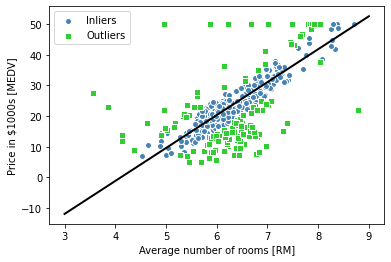

In [23]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [24]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


# 선형 회귀 모델의 성능 평가

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [26]:
import numpy as np
import scipy as sp

ary = np.array(range(100000))

In [27]:
%timeit np.linalg.norm(ary)

215 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit sp.linalg.norm(ary)

214 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit np.sqrt(np.sum(ary**2))

73 µs ± 780 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


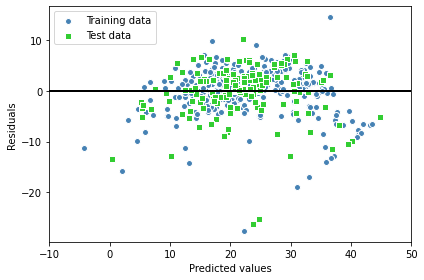

In [30]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673


보통 모델 성능을 측정하는 방법 중 **평균 제곱 오차**(MSE)를 많이 사용한다.

# 회귀에 규제 적용

회귀에 규제를 사용하여 과대적합 문제를 방지  

하이퍼파라미터 $\lambda$를 증가시키면 규제 강도가 증가되고 모델의 가중치 값이 감소

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [33]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


릿지 회귀: 최소 제곱 비용 함수에 가중치의 제곱합을 추가한 L2 규제 모델  

$J(w)_{ridge} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)} \right)^2 + \lambda \lVert w \rVert_2^2$  

$L2$: $\lambda \lVert w \rVert_2^2 = \lambda \sum_{j=1}^m w_j^2$

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

리쏘 회귀: 최소 제곱 비용 함수에 가중치의 절댓값의 합을 추가한 L1 규제 모델  

$J(w)_{lasso} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)} \right)^2 + \lambda \lVert w \rVert_1$  

$L2$: $\lambda \lVert w \rVert_1 = \lambda \sum_{j=1}^m \left\vert w_j \right\vert$

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

엘라스틱 넷 회귀: 릿지 회귀와 라쏘의 절충안으로 희소한 모델을 만들기 위한 L1 페널티와 m > n일 때 n보다 많은 특성을 선택할 수 잇는 L2 페널티 사용  

$J(w)_{elasticnet} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)} \right)^2 + \lambda \sum_{j=1}^m w_j^2 + \lambda \sum_{j=1}^m \left\vert w_j \right\vert$

In [36]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 선형 회귀 모델을 다항 회귀로 변환

특성과 타깃 사이의 관계가 선형 가정이 어긋난다면 다항식 항을 추가한 다항 회귀 모델을 사용할 수 있다.  

$y=w_0+w_1x+w_2x^2+ \cdots +w_dx^d$

In [38]:
# 1. 이차 다항식 항 추가
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

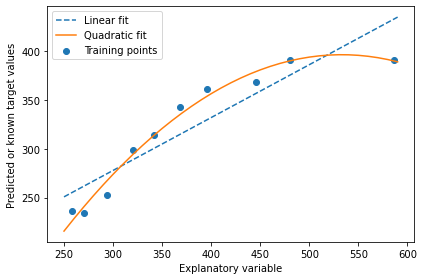

In [40]:
# 2. 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 3. 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 4. 결과 그래프
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [42]:
print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


결과에서 볼 수 있듯이 다항 모델에서 MSE가 감소하고, $R^2$값이 증가했다.

## 주택 데이터셋을 사용한 비선형 관계 모델링

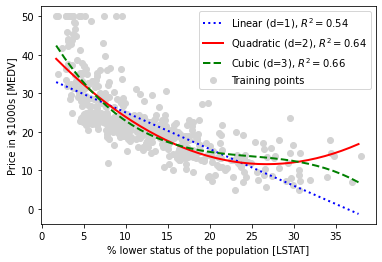

In [43]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

다항 특성을 늘리면 모델 복잡도가 높아지고 과대적합의 가능성이 증가한다는걸 주의

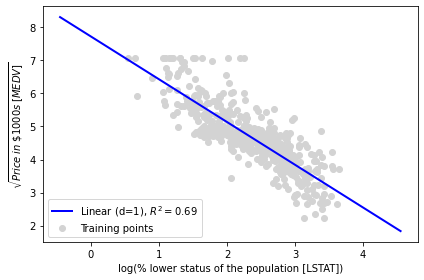

In [44]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# 특성을 변환합니다
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프를 그립니다
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# 랜덤 포레스트를 사용하여 비선형 관계 다루기

## 결정 트리 회귀

결정 트리는 리프 노드가 순수 노드가 되거나 종료 기준을 만족할 대까지 반복적으로 노드를 분할  
분류에서 결정 트리를 사용할 때 **정보 이득**(IG)이 최대화 되도록 불순도 지표로 엔트로피 정의  

엔트로피:  
$IG\left( D_p, x_i \right) = I\left( D_p \right) - {N_{left} \over N_p}I\left( D_left \right) - {N_{right} \over N_p}I\left( D_right \right)$  


회귀에 결정 트리를 사용하려면 연속적인 특송에 적합한 불순도 지표가 필요하므로 MSE를 노드 t의 불순도 지표로 정의  
$I(t) = MSE(t) = {1 \over N_t} \sum_{i \in D_t} \left(y^{(i)} - \hat{y}_t \right)^2$  

- $N_t$: 노드 t에 있는 훈련 샘플 개수
- $D_t$: 노드 t에 있는 훈련 샘플 집합
- $y^{(i)}$: 정답 타깃 값
- $\hat{y}_t$: 예측된 타깃 값(샘플 평균)  

$\hat{y}_t = {1 \over N_t} \sum_{i \in D_t} y^{(i)}$

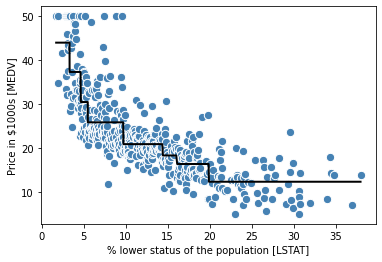

In [45]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## 랜덤 포레스트 회귀

결정 트리와 랜덤 포레스트는 거의 유사하나 개별 결정 트리를 성장시키기 위해 MSE 기준을 사용하는 것이 유일한 차이점이다.  
타깃 값의 예측은 모든 결정 트리의 예측을 평균하여 계산

In [46]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 1.644, 테스트 MSE: 11.085
훈련 R^2: 0.979, 테스트 R^2: 0.877


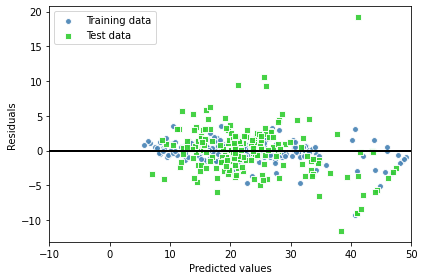

In [48]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()